<a href="https://colab.research.google.com/github/m-volnykh/Programming6/blob/main/LR03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 3
Выполнила Вольных Мария Валентиновна

## 1. Загрузка данных для обучения

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
%%capture
!wget https://github.com/nzhukov/14-09-2020-example/raw/refs/heads/master/training_data.xlsx
!wget https://github.com/nzhukov/14-09-2020-example/raw/refs/heads/master/test_data.xlsx

In [ ]:
training_data = pd.read_excel('training_data.xlsx', usecols=lambda x: 'Unnamed' not in x) # загружаем таблицу в переменную training_data
training_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [ ]:
training_data.shape

(4913, 12)

In [ ]:
# 1. TO DO
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4913 non-null   int64  
 1   year          4913 non-null   int64  
 2   condition     4913 non-null   int64  
 3   cylinders     4913 non-null   int64  
 4   odometer      4913 non-null   int64  
 5   title_status  4913 non-null   object 
 6   transmission  4913 non-null   object 
 7   drive         4651 non-null   object 
 8   size          3825 non-null   object 
 9   lat           4913 non-null   float64
 10  long          4913 non-null   float64
 11  weather       4801 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 460.7+ KB


## 2. Обработка данных перед обучением

Обработка данных

In [ ]:
# 2. TO DO
training_data = training_data.dropna()

# 3. TO DO
training_data = training_data._get_numeric_data()
training_data.shape
#training_data.head()

(3659, 8)

Text(0, 0.5, 'Number of cars')

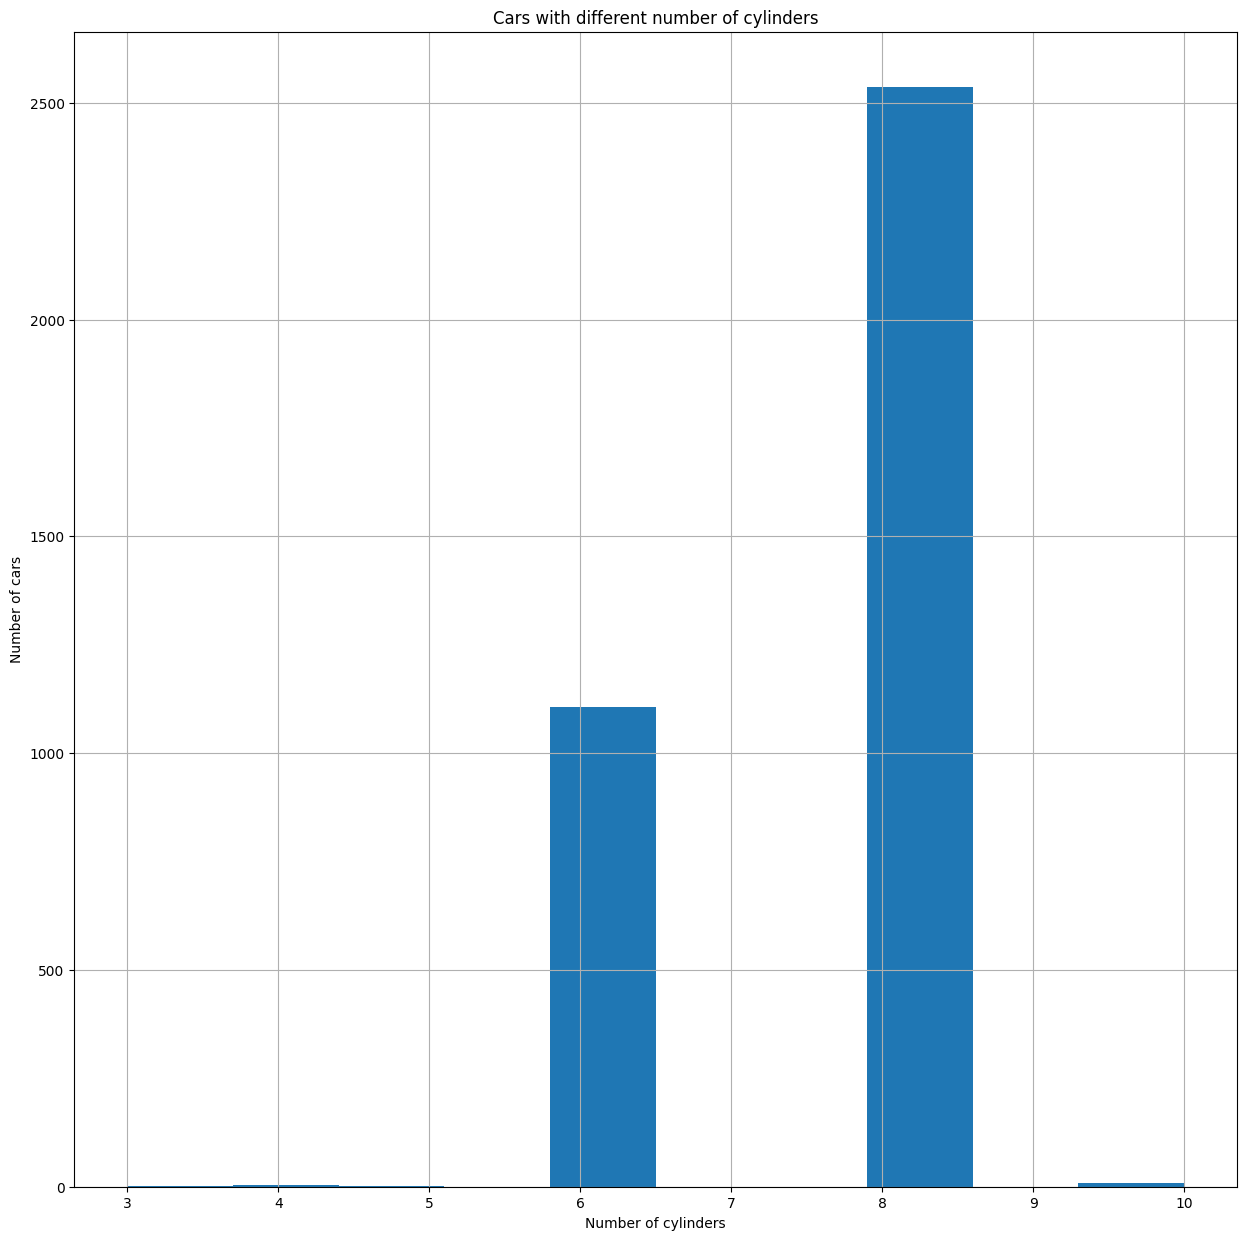

In [ ]:
# 4. TO DO
training_data['cylinders'].hist(figsize = (15,15))
plt.title('Cars with different number of cylinders')
plt.xlabel('Number of cylinders')
plt.ylabel('Number of cars')

#print(training_data['cylinders'].value_counts())
#for i, v in enumerate(training_data['cylinders'].value_counts()):
#      plt.text(i, v, str(v))

Выделение данных для обучения

In [ ]:
# 5. TO DO
target_variable_name = 'price'
training_values = training_data[target_variable_name]

# 6. TO DO
training_points = training_data.drop(target_variable_name, axis=1)
training_points.head()

,year,condition,cylinders,odometer,lat,long,weather
0,2016,4,6,43500,36.471500,-82.483400,59.0
1,2009,2,8,98131,40.468826,-74.281734,52.0
2,2002,2,8,201803,42.477134,-82.949564,45.0
3,2000,1,8,170305,40.764373,-82.349503,49.0
5,2003,3,8,167662,45.518031,-122.578752,50.0


In [ ]:
training_points.shape

(3659, 7)

## 3. Создание моделей на основе обучающей выборки
Создание и обучение модели линейной регрессии

In [ ]:
# 8. TO DO
from sklearn import linear_model, ensemble

linear_regression_model = linear_model.LinearRegression(n_jobs = 1)
linear_regression_model

# 10. TO DO
linear_regression_model.fit(training_points, training_values)

LinearRegression(n_jobs=1)

Создание и обучение модели случайных деревьев

In [ ]:
# 9. TO DO
random_forest_model = ensemble.RandomForestRegressor(random_state = 42)
random_forest_model

# 11. TO DO
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(random_state=42)

## 4. Загрузка и предобработка данных для тестирования моделей

In [ ]:
# 12. TO DO
test_data = pd.read_excel('test_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
test_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,5990,2004,4,8,210445,clean,automatic,4wd,full-size,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,clean,automatic,4wd,full-size,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,clean,automatic,4wd,full-size,36.060541,-95.795447,57.0
3,24988,2012,4,6,85572,clean,automatic,4wd,NaN,30.457703,-84.347448,65.0
4,20995,2014,3,6,157556,clean,automatic,NaN,full-size,42.701772,-89.008858,45.0


In [ ]:
# 13. TO DO
test_data.shape

(2104, 12)

In [ ]:
# 14. TO DO
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2104 non-null   int64  
 1   year          2104 non-null   int64  
 2   condition     2104 non-null   int64  
 3   cylinders     2104 non-null   int64  
 4   odometer      2104 non-null   int64  
 5   title_status  2104 non-null   object 
 6   transmission  2104 non-null   object 
 7   drive         1975 non-null   object 
 8   size          1628 non-null   object 
 9   lat           2104 non-null   float64
 10  long          2104 non-null   float64
 11  weather       2036 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 197.4+ KB


Удаление пропусков из тестовых данных

In [ ]:
# 15. TO DO
test_data = test_data.dropna()
test_data.shape

(1543, 12)

Оставляем только числовые характеристики

In [ ]:
# 16. TO DO
test_data = test_data._get_numeric_data()
test_data.head()

,price,year,condition,cylinders,odometer,lat,long,weather
0,5990,2004,4,8,210445,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,36.060541,-95.795447,57.0
8,20495,2013,3,6,108500,42.612400,-83.034500,45.0
9,6000,2000,3,8,69600,32.832296,-97.169012,67.0


Выделяем целевую переменную и данные

In [ ]:
# 17. TO DO
test_values = test_data[target_variable_name]

# 18. TO DO
test_points = test_data.drop(target_variable_name, axis=1)
print(list(test_points) == list(training_points))
print(test_points.shape)
test_points.head()

True
(1543, 7)


,year,condition,cylinders,odometer,lat,long,weather
0,2004,4,8,210445,38.731803,-90.073678,48.0
1,2015,2,6,142282,42.504823,-92.405569,47.0
2,2012,3,6,100710,36.060541,-95.795447,57.0
8,2013,3,6,108500,42.612400,-83.034500,45.0
9,2000,3,8,69600,32.832296,-97.169012,67.0


## Валидация модели на тестовой выборке

Модель линейной регрессии

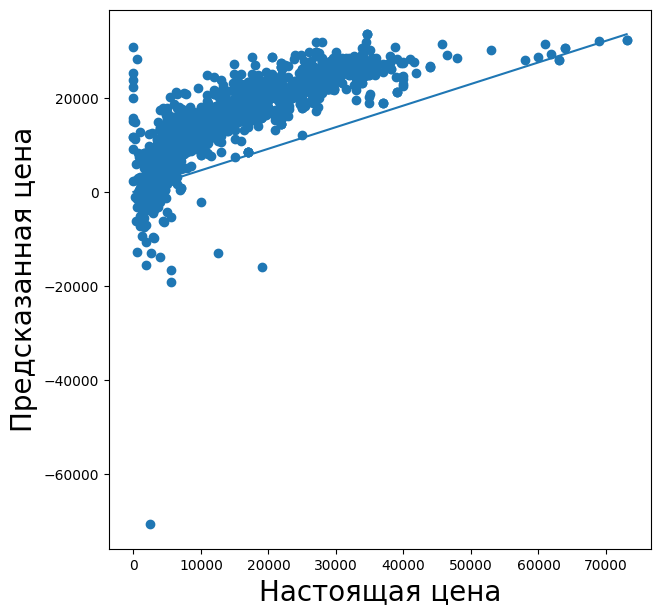

In [ ]:
# 19. TO DO
test_predictions_linear = linear_regression_model.predict(test_points)

plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_linear)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Модель случайных деревьев

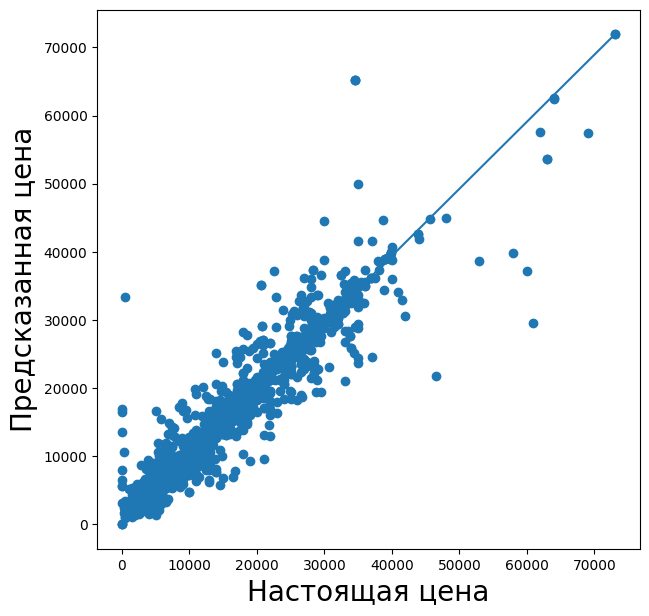

In [ ]:
# 20. TO DO
test_predictions_random_forest = random_forest_model.predict(test_points)

plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_random_forest)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Проверка моделей с помощью метрик качества регрессионной модели

In [ ]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

# 21. TO DO
print("MAE: {0:7.2f}, RMSE: {1:7.2f} for linear model".format(
        mean_absolute_error(test_values, test_predictions_linear),
        mean_squared_error(test_values, test_predictions_linear)**0.5))

# 22. TO DO
print("MAE: {0:7.2f}, RMSE: {1:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest),
       mean_squared_error(test_values, test_predictions_random_forest)**0.5))

MAE: 4485.56, RMSE: 6656.34 for linear model
MAE: 1828.15, RMSE: 3543.72 for random forest model


## 6. Бонус: категориальные признаки

In [ ]:
training_data = pd.read_excel('training_data.xlsx')
training_data = training_data.drop('Unnamed: 0', axis = 1)
training_data = training_data.dropna()

training_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0


In [ ]:
test_data = pd.read_excel('test_data.xlsx')
test_data = test_data.drop('Unnamed: 0', axis = 1)
test_data = test_data.dropna()

test_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,5990,2004,4,8,210445,clean,automatic,4wd,full-size,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,clean,automatic,4wd,full-size,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,clean,automatic,4wd,full-size,36.060541,-95.795447,57.0
8,20495,2013,3,6,108500,clean,automatic,4wd,full-size,42.612400,-83.034500,45.0
9,6000,2000,3,8,69600,clean,automatic,rwd,full-size,32.832296,-97.169012,67.0


In [ ]:
# 23. TO DO
from sklearn import preprocessing as prep

text_categor_cols = ['title_status', 'transmission', 'drive', 'size']

# 24. TO DO
le = prep.LabelEncoder()

# 25. TO DO
for col in text_categor_cols:
    training_data[col] = le.fit_transform(training_data[col])
    test_data[col] = le.fit_transform(test_data[col])

print('le.classes: ', le.classes_)
print(training_data['drive'].value_counts())
print('Training Data:')
training_data.head()

le.classes:  ['compact' 'full-size' 'mid-size']
drive
0    2681
2     930
1      48
Name: count, dtype: int64
Training Data:


,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,0,0,0,1,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,0,0,0,1,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,0,0,0,1,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,3,0,0,1,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,0,0,0,1,45.518031,-122.578752,50.0


In [ ]:
print('Testing Data:')
test_data.head()

Testing Data:


,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,5990,2004,4,8,210445,0,0,0,1,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,0,0,0,1,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,0,0,0,1,36.060541,-95.795447,57.0
8,20495,2013,3,6,108500,0,0,0,1,42.612400,-83.034500,45.0
9,6000,2000,3,8,69600,0,0,2,1,32.832296,-97.169012,67.0


Выделяем переменные и метки

In [ ]:
# 26. TO DO
training_values = training_data[target_variable_name]
training_points = training_data.drop(target_variable_name, axis=1)

test_values = test_data[target_variable_name]
test_points = test_data.drop(target_variable_name, axis=1)

list(test_points) == list(training_points)

True

In [ ]:
# 27. TO DO
random_forest_le = ensemble.RandomForestRegressor(random_state = 42)
random_forest_le.fit(training_points, training_values)

RandomForestRegressor(random_state=42)

In [ ]:
# 28. TO DO
test_predictions_random_forest_le = random_forest_le.predict(test_points)
print('Using only numeric features')
print("MAE: {0:7.2f}, RMSE: {1:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest),
       mean_squared_error(test_values, test_predictions_random_forest)**0.5))

Using only numeric features
MAE: 1828.15, RMSE: 3543.72 for random forest model


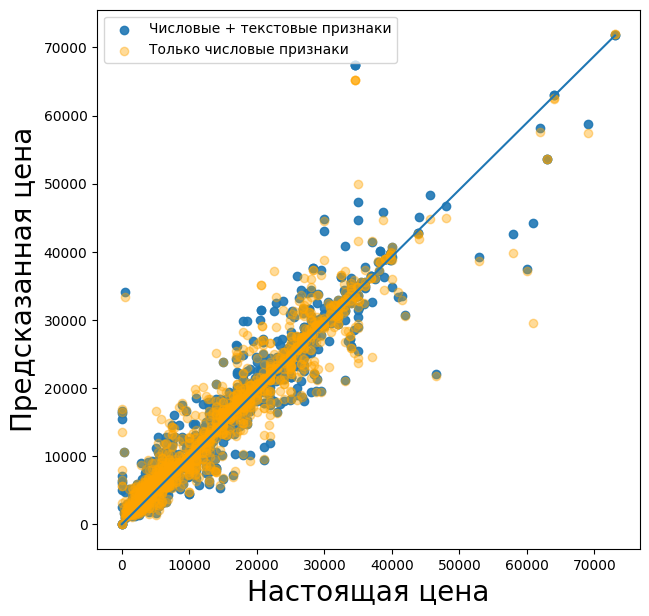

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest_le, alpha=0.9, label='Числовые + текстовые признаки');
plt.scatter(test_values, test_predictions_random_forest, color='orange', alpha=0.4, label='Только числовые признаки');
plt.plot([0, max(test_values)], [0, max(test_predictions_random_forest_le)]);

plt.legend()
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

## 7. Бонус*: One Hot Encoding

Обновление и обработка данных

In [ ]:
training_data = pd.read_excel('training_data.xlsx')
training_data = training_data.drop('Unnamed: 0', axis = 1)
training_data = training_data.dropna()

test_data = pd.read_excel('test_data.xlsx')
test_data = test_data.drop('Unnamed: 0', axis = 1)
test_data = test_data.dropna()

training_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0


In [ ]:
# 30. TO DO
from sklearn.preprocessing import OneHotEncoder

categ_cols = ['condition', 'cylinders', 'title_status', 'transmission', 'drive', 'size']
other_cols = ['price', 'year', 'odometer', 'lat', 'long', 'weather']

# 31. TO DO
ohe = OneHotEncoder(sparse_output=False)

# 32. TO DO
training_data_categ = training_data[categ_cols]
test_data_categ = test_data[categ_cols]

# 33. TO DO
training_data_other = training_data[other_cols]
test_data_other = test_data[other_cols]

# 34. TO DO
for col in categ_cols:
    training_data_categ[col] = le.fit_transform(training_data_categ[col])
    test_data_categ[col] = le.transform(test_data_categ[col])

<ipython-input-105-537a1e9a5189>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data_categ[col] = le.fit_transform(training_data_categ[col])
<ipython-input-105-537a1e9a5189>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_categ[col] = le.transform(test_data_categ[col])
<ipython-input-105-537a1e9a5189>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta